In [2]:
# Pacotes iniciais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data import and initial analysis

In [3]:
df = pd.read_csv('../data/Bias_correction_ucl.csv')

### Data description

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [4]:
print(df.head())
print(df.shape)

   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0  2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0  2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0  2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0  2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

The data is a timeseries with meteorological measurements and prediction variables (21) of 25 different stations. The data is rather well behaved, with not many orders of magnitude of variation between them. It might not be necessary to transform the input data.

The questions that come up to mind right now are:
1. Is there a correlation of one station to another? In principle it should, but it might change with time (wind direction change, perhaps);
2. Is there a correlation of the actual data with its past data? In principle it should, however, it might be possible to predict the variables with the indirect measurements and predictions, only.

Let's evaluate the data completeness.

In [5]:
cons = pd.DataFrame({'columns' : df.columns,
                    'type': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unique': df.nunique()})
cons['null-nbr'] = round(cons['missing'] / cons['size'],2)
cons

columns     type  missing  size  unique  null-nbr
station                    station  float64        2  7752      25      0.00
Date                          Date   object        2  7752     310      0.00
Present_Tmax          Present_Tmax  float64       70  7752     167      0.01
Present_Tmin          Present_Tmin  float64       70  7752     155      0.01
LDAPS_RHmin            LDAPS_RHmin  float64       75  7752    7672      0.01
LDAPS_RHmax            LDAPS_RHmax  float64       75  7752    7664      0.01
LDAPS_Tmax_lapse  LDAPS_Tmax_lapse  float64       75  7752    7675      0.01
LDAPS_Tmin_lapse  LDAPS_Tmin_lapse  float64       75  7752    7675      0.01
LDAPS_WS                  LDAPS_WS  float64       75  7752    7675      0.01
LDAPS_LH                  LDAPS_LH  float64       75  7752    7675      0.01
LDAPS_CC1                LDAPS_CC1  float64       75  7752    7569      0.01
LDAPS_CC2                LDAPS_CC2  float64       75  7752    7582      0.01
LDAPS_CC3                LDAPS_CC3  float64       75  7752    7599      0.01
LDAPS_CC4                LDAPS_CC4  float64       75  7752    7524      0.01
LDAPS_PPT1              LDAPS_PPT1  float64       75  7752    2812      0.01
LDAPS_PPT2              LDAPS_PPT2  float64       75  7752    2510      0.01
LDAPS_PPT3              LDAPS_PPT3  float64       75  7752    2356      0.01
LDAPS_PPT4              LDAPS_PPT4  float64       75  7752    1918      0.01
lat                            lat  float64        0  7752      12      0.00
lon                            lon  float64        0  7752      25      0.00
DEM                            DEM  float64        0  7752      25      0.00
Slope                        Slope  float64        0  7752      27      0.00
Solar radiation    Solar radiation  float64        0  7752    1575      0.00
Next_Tmax                Next_Tmax  float64       27  7752     183      0.00
Next_Tmin                Next_Tmin  float64       27  7752     157      0.00

The measurements are all float numbers, no need to encode variables.

27 different slopes? In principle it looks strange. The data is from June to August, which corresponds to summer season in South Korea. Error or earth inclination modification?

If there is no Tmax, Tmin or station or date, then it seems that the data should be discarded.
In principle all lines with NaN will be discarded, as it seems that the data is important. It can be checked in the future if a simple AR-like model with only Present_Tmax and Present_Tmin is enough to predict Next_Tmax and Next_Tmin, then it would not be necessary to use all data, but this seems unlikely now.

In [21]:
df = df[df['Present_Tmax'].notna() & df['Present_Tmin'].notna() & 
        df['Next_Tmax'].notna() & df['Next_Tmin'].notna() & 
        df['station'].notna() & df['Date'].notna() & 
        df['LDAPS_RHmin'].notna()]

np.max(df.isna().sum())
# df.nunique()

0

## Initial data exploration

/tmp/ipykernel_172966/2297514544.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


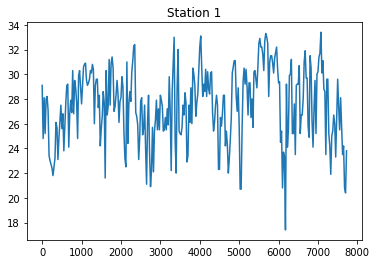

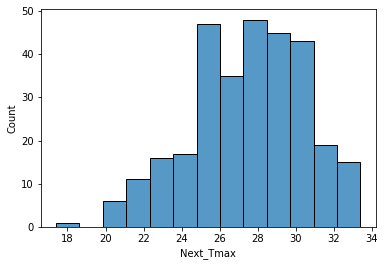

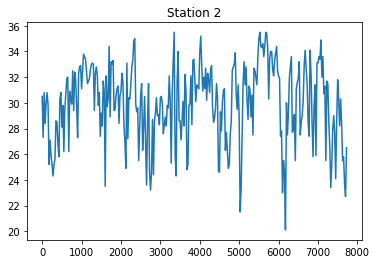

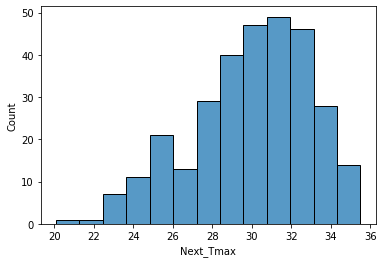

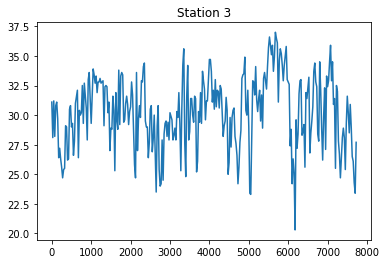

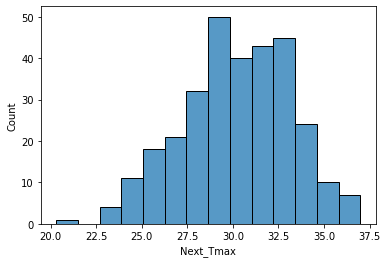

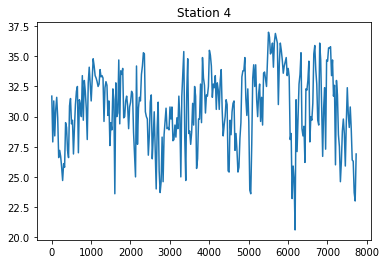

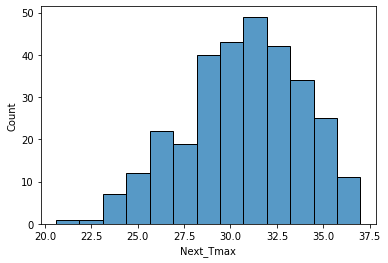

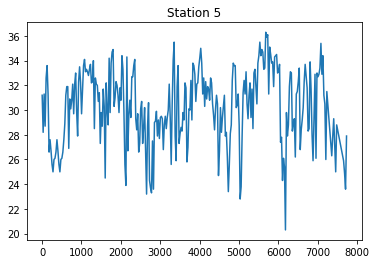

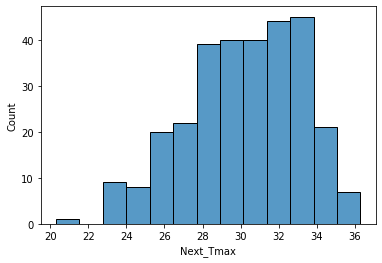

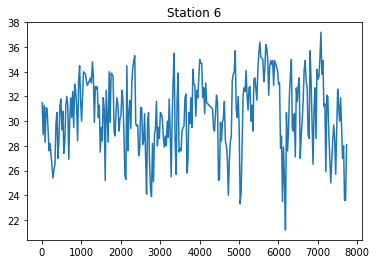

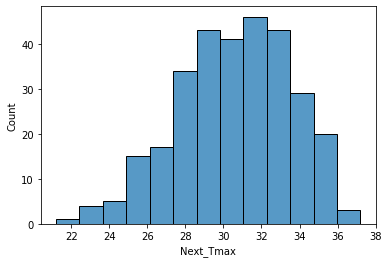

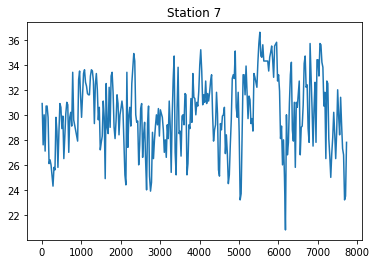

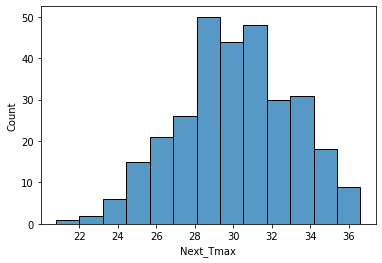

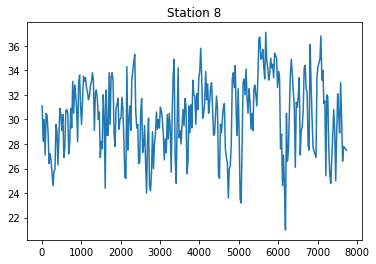

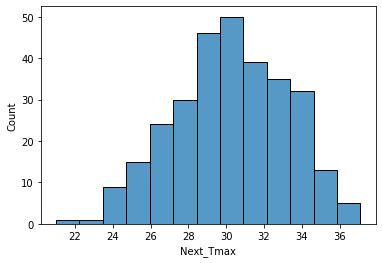

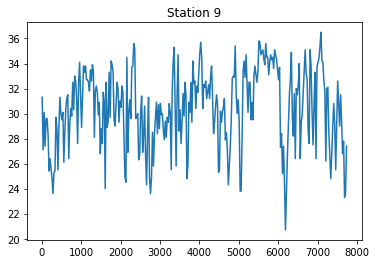

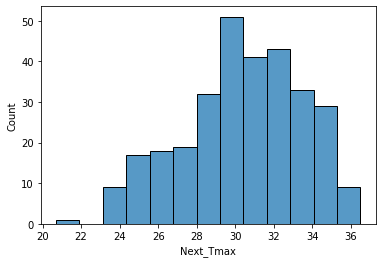

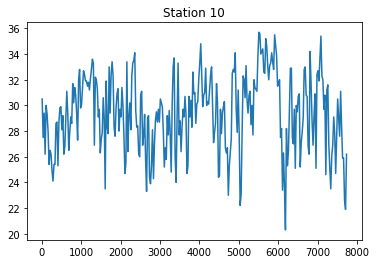

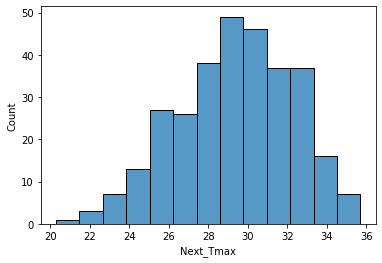

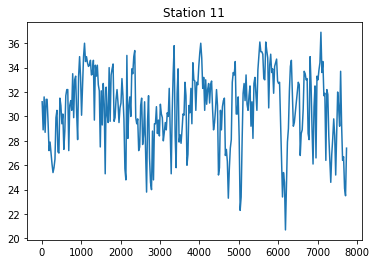

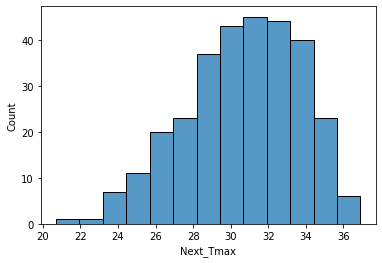

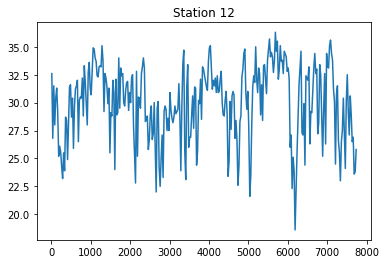

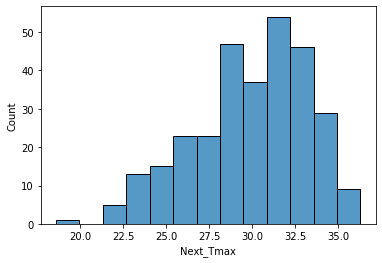

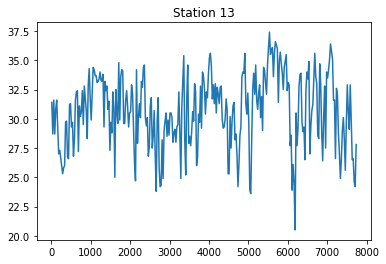

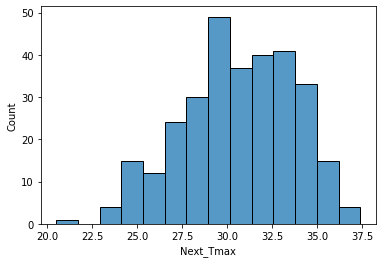

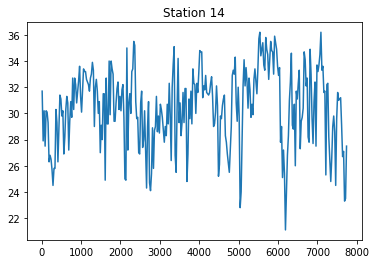

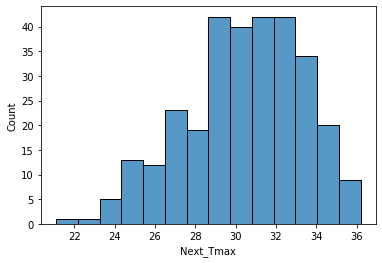

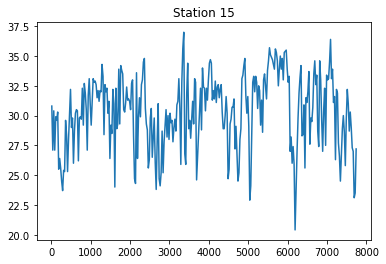

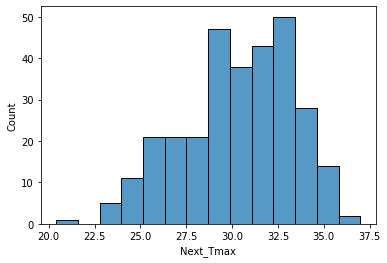

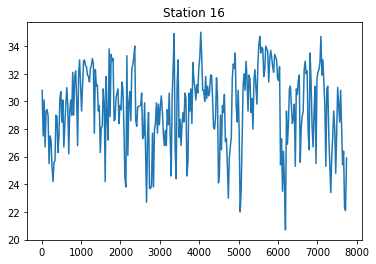

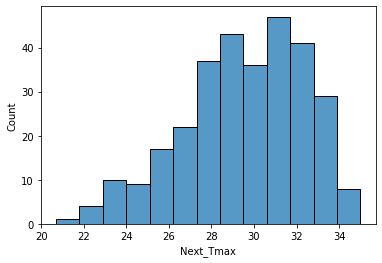

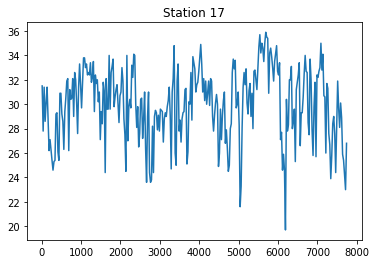

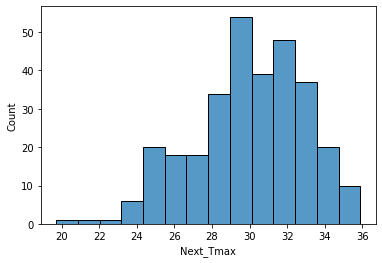

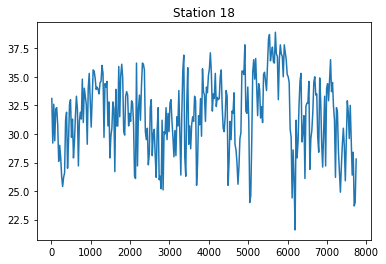

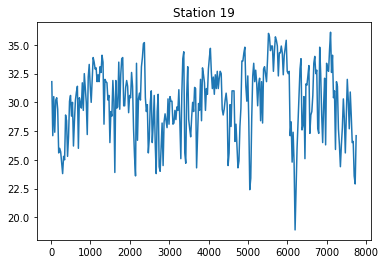

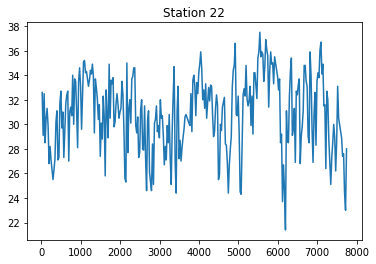

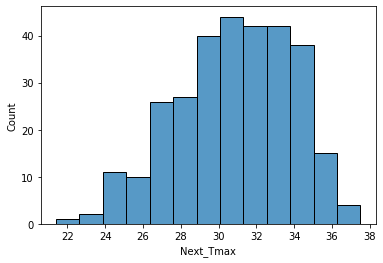

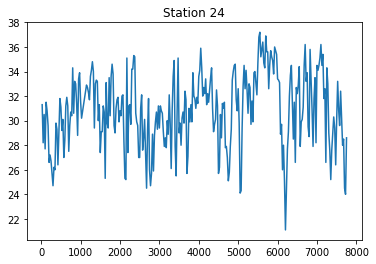

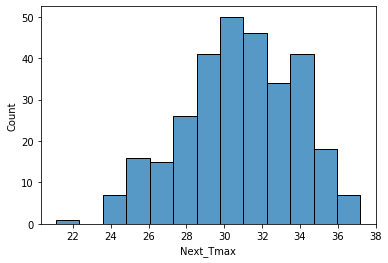

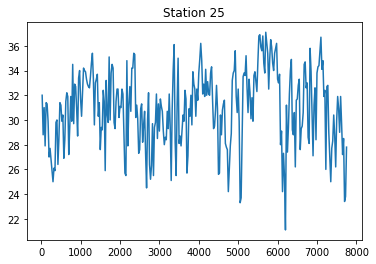

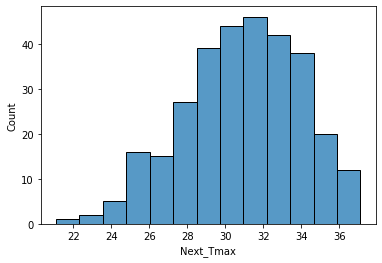

In [20]:
variable = 'Next_Tmax'

for i in range(1, 26):
    plt.figure()
    df[df['station']==i][variable].plot()
    plt.title(f'Station {i}')

    plt.figure()
    sns.histplot(df[df['station']==i][variable])

The slopes were fixed when the missed data were removed. No more strange slopes.
Solar radiation is a predicted variable that is the same for every station.

At this point, the correlations are evaluated.

### What is the correlation between the variables in the same day and in the same station?

/tmp/ipykernel_172966/3034902835.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


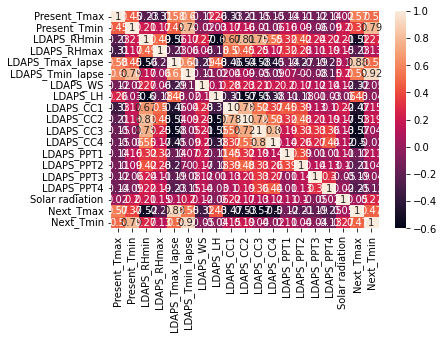

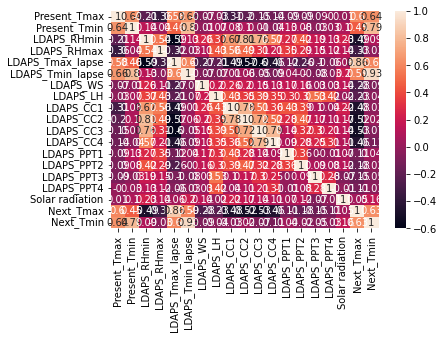

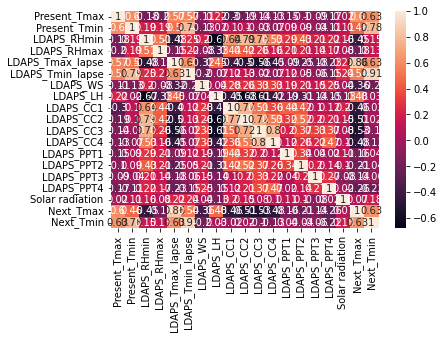

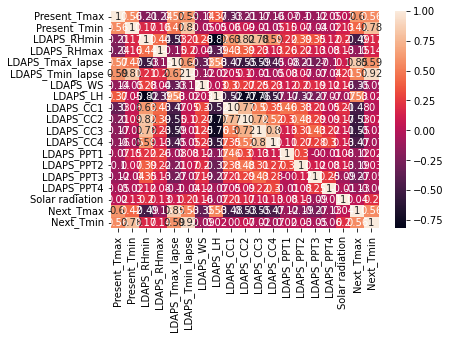

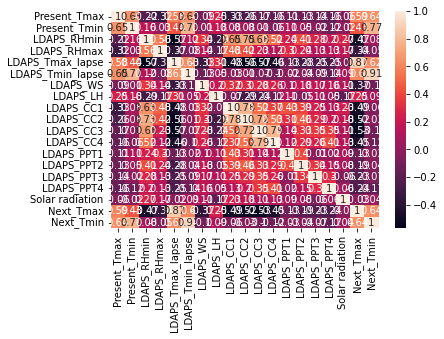

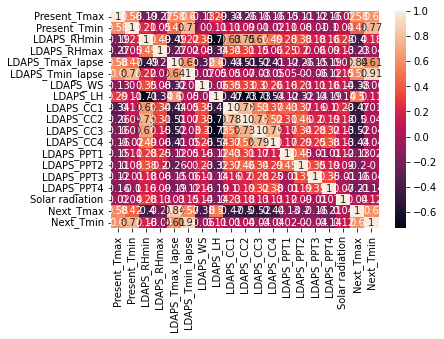

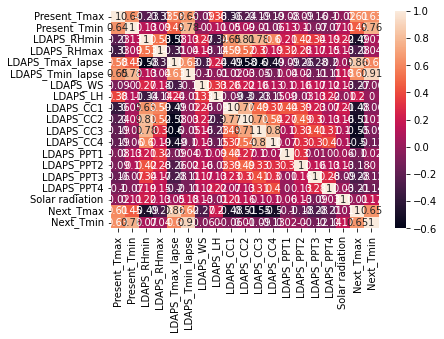

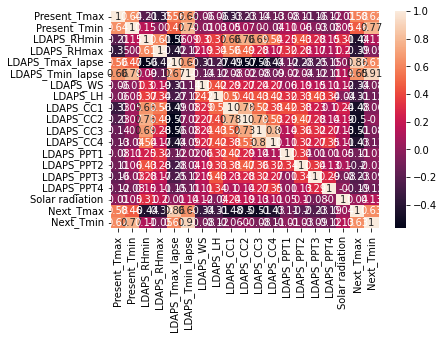

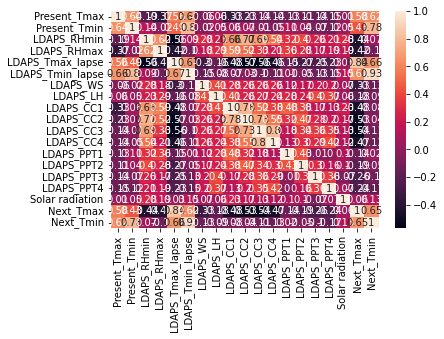

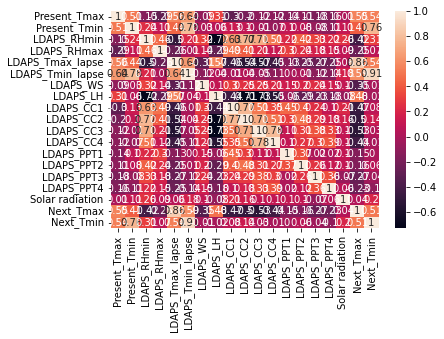

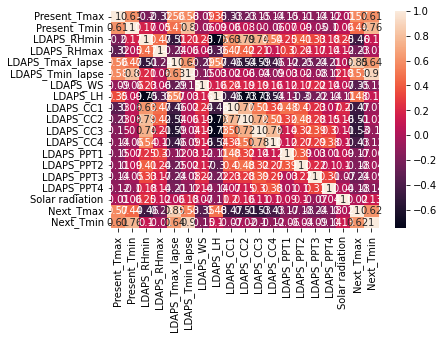

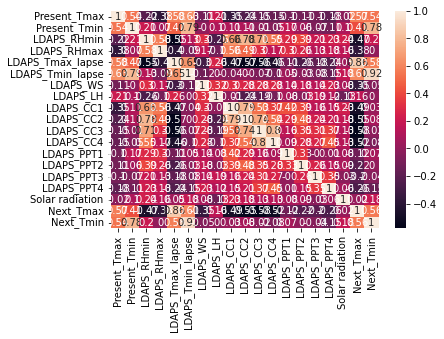

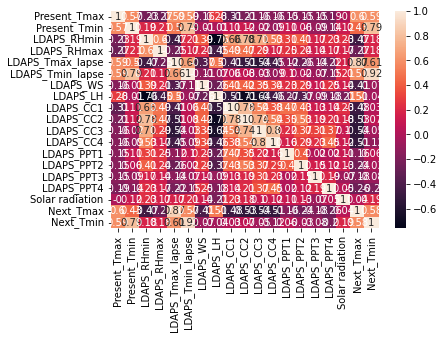

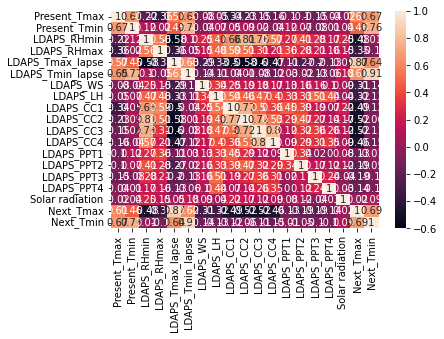

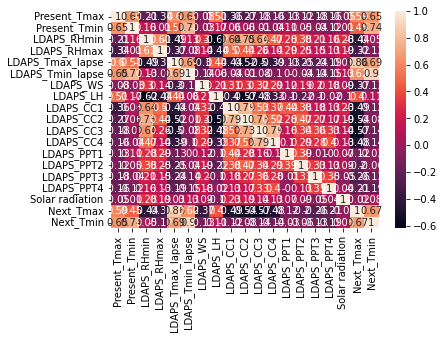

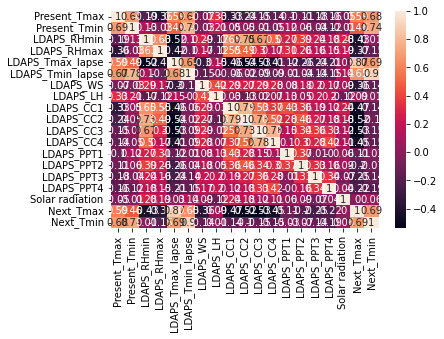

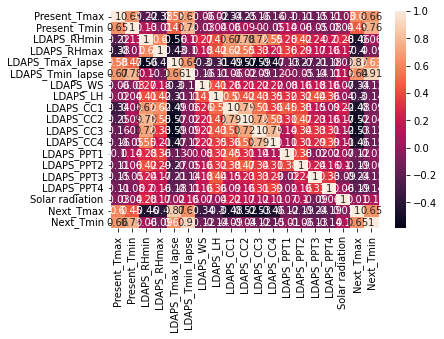

In [8]:
useful_columns = [
                  'Present_Tmax',
                  'Present_Tmin',
                  'LDAPS_RHmin',
                  'LDAPS_RHmax',
                  'LDAPS_Tmax_lapse',
                  'LDAPS_Tmin_lapse',
                  'LDAPS_WS',
                  'LDAPS_LH',
                  'LDAPS_CC1',
                  'LDAPS_CC2',
                  'LDAPS_CC3',
                  'LDAPS_CC4',
                  'LDAPS_PPT1',
                  'LDAPS_PPT2',
                  'LDAPS_PPT3',
                  'LDAPS_PPT4',
                  'Solar radiation',
                  'Next_Tmax',
                  'Next_Tmin',
                  ]

for i in range(1, 26):
    plt.figure()
    sns.heatmap(df[df['station']==i][useful_columns].corr().round(2), annot= True)

Many variables have a high correlation with Next_Tmax and Next_Tmin. Some interfere more with Tmax than with Tmin. LDAPS_Tmax_lapse and LDAPS_Tmin_lapse have a high correlation with the desired predicted variables.

The correlation coefficient depends on the station, however, the variables have quite the same influence.

It seems more adapted to have one model for each station, instead of letting the job to the model based on the longitude, latitude, elevation and slope.

### How about the variables autocorrelation?

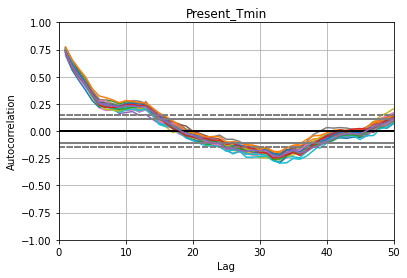

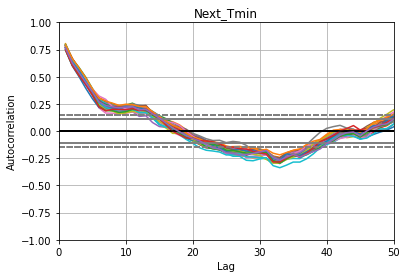

In [19]:
variables = ['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']

for variable in variables:
    plt.figure()
    plt.title(variable)
    for i in range(1, 26):
        pd.plotting.autocorrelation_plot(df[df['station']==i][variable])
        plt.xlim((0,50))

It is not surprising that the timeseries has a considerable autocorrelation. This means that the actual value can be, at least to some degree, explained by a linear combination of its past values. The autocorrelation plot, with decreasing values in the initial lags, indicates that the timeseries might present a trend.